In this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference. The raw image is available in spicy.misc package with the name face

In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc

%matplotlib inline

In [6]:
face = scipy.misc.face()
face.shape

(768, 1024, 3)

In [7]:
face.max()

255

In [8]:
face.dtype

dtype('uint8')

In [9]:
#getting pixel values
face_np=np.array(face)
face_np[0:2]

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]]], dtype=uint8)

In [12]:
#changing the shape of the data into 768*1024 rows and 3 columns
pixels=face_np.reshape(face_np.shape[0] * face_np.shape[1], face_np.shape[2])
pixels.shape

(786432, 3)

In [13]:
#compressing the image into 5 clusters
model= KMeans(n_clusters= 5)
model.fit(pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
#to obtain number of cluster assigned to each point or pixel
pixel_centroids = model.labels_
cluster_centers = model.cluster_centers_
pixel_centroids

array([2, 1, 1, ..., 2, 2, 2])

In [15]:
# coordinates  or the RGB values of 5 cluster centers
cluster_centers

array([[ 26.7626932 ,  30.65930701,  21.22417355],
       [155.67239338, 165.93221181, 140.34377059],
       [113.31108685, 122.6629772 , 102.48775247],
       [196.60020973, 192.00878857, 205.41372216],
       [ 73.62694554,  83.55461221,  62.45601826]])

In [16]:
#creating matrix of shape(786432, 3) corresponding to pixels and initialize it with zeros
final= np.zeros((pixel_centroids.shape[0],3))
final.shape

(786432, 3)

In [17]:
#iterating through all the clusters and assigning the cluster centroids (RGB values) to each data point
#thereby reducing our image into 5 colors
for cluster_no in range(5):
    final[pixel_centroids==cluster_no] = cluster_centers[cluster_no]
final[0:5]

array([[113.31108685, 122.6629772 , 102.48775247],
       [155.67239338, 165.93221181, 140.34377059],
       [155.67239338, 165.93221181, 140.34377059],
       [155.67239338, 165.93221181, 140.34377059],
       [155.67239338, 165.93221181, 140.34377059]])

In [18]:
#reshaping the compressed image into original dimension
comp_image = final.reshape(face_np.shape[0],face_np.shape[1],3)
comp_image.shape

(768, 1024, 3)

In [19]:
##saving the image
from PIL import Image
comp_image = Image.fromarray(np.uint8(comp_image))
comp_image.save('dt_compressed.png')

In [20]:
img1 = face
img2 = mpimg.imread('dt_compressed.png')

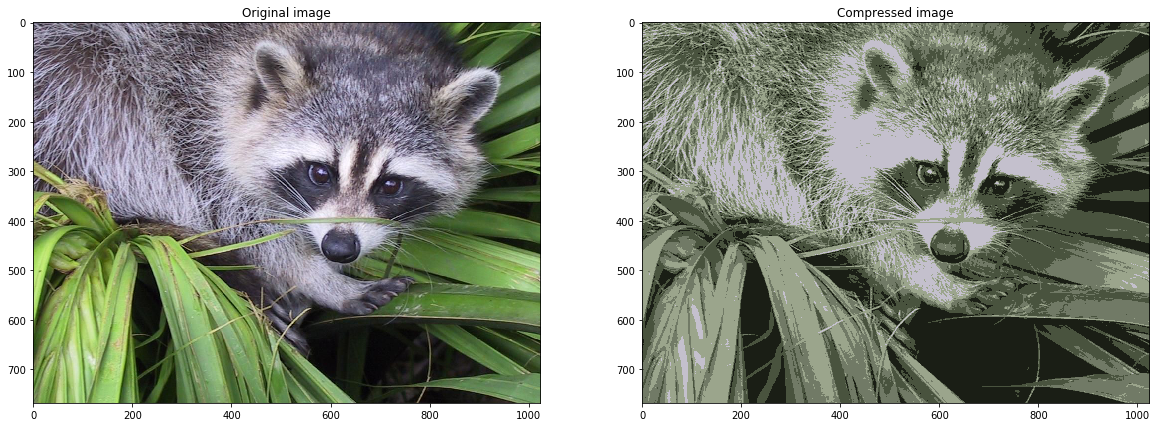

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,20))
ax1.imshow(img1)
ax1.set_title('Original image')
ax2.imshow(img2)
ax2.set_title('Compressed image')
plt.show()
